**databehandling 2025-11-03**

Plotly Express
Bra verktyg för presentationer 

- Ord:  
Logaritmisk -   

måndag vecka 46 distans måndag. 
onsdag gruppindelning 
redovisning för projektet, både i grupp och individuellt. 


pip install plotly  
pip install plotly_express  
pip install nbformat  


In [ ]:
import plotly_express as px 
gapminder = px.data.gapminder()

# compare nordic countries 
nordic = gapminder[gapminder["country"].isin(["Sweden", "Norway", "Iceland", "Denmark", "Finland"])]
nordic2007 = nordic[nordic["year"]==2007]

nordic.country.value_counts()

In [ ]:
sweden = gapminder[gapminder["country"] == "Sweden"]
sweden.head()

In [ ]:
fig = px.bar(sweden, x="year", y="pop", range_y=[
       5e6, 10e6], title=f"Population in Sweden {sweden['year'].min()}-{sweden['year'].min()}",
       labels = dict(year="Year", pop="Population")) # NOTE: year and pop in labels dictionary are the previous names 

fig.show() # install nbformat >= 4.2.0 and jupyter notebook renderer extension 

In [ ]:
# compare Nordic countries 
fig = px.bar(nordic2007, x="country", y="gdpPercap", color="country", title="Nordic countries GDP per cap year 2007")
fig.show()

In [ ]:
fig = px.line(sweden, x="year", y="gdpPercap", title="GDP per capita Sweden")
fig.show()

In [ ]:
# adding some useful settings
fig = px.line(nordic, x="year", y="gdpPercap", color="country",
              title="Nordic countries GDP per capita 1952-2007",
              labels={"gdpPercap":"GDP per capita"})

fig.update_layout(hovermode="x")
fig.update_xaxes(
    showspikes=True,
    spikedash="solid",
    spikecolor="green",
    spikemode="across",
    spikesnap="cursor"
)

fig.show()

Pie chart  

Gapminder - bubble chart
- bubble chart using scatter
- many dimensions can be shown using bubble charts as you can control:
- size  
- x, y
- hover data
- color
- run the code in a python script for animation to work (funkar inte alltid i jupyter notebook)

In [ ]:
fig = px.pie(nordic2007, values="pop", title="Population of nordic countries", names="country",
             hover_data=["gdpPercap"])

fig.update_traces(textinfo="label+percent")
fig.show()

In [ ]:
# tre dimensioner 

gapminder.head()


In [ ]:

len(gapminder["country"].unique())


In [ ]:

fig = px.scatter(gapminder, x="gdpPercap", y="lifeExp",
           size="pop", color="country", size_max=70, log_x=True,
           animation_frame="year", animation_group="country", title="Gapminder",
           range_x=[100, 100000], range_y=[25,90])
fig.show()

Stockdata 1 - API  
- Stocks API
- Go into Alpha Vantage and read the documentation of the time series APIs

- Go into claim API key and fill in the form to claim your free API-key

- You will be using the API key to access stock data

- Create a file called .env and type:

- ALPHA_API_KEY = ...  
the dots should be your API key  
go into your .gitignore file in your repo and make sure that there is .env there so that you don't push the .env file to a public Github repo where anyone can access your key and do stuffs in your name  
  
Setup  
  
pip install python-dotenv  
Symbols of stocks that is useful for get-request  

In [ ]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
# NOTE: you can print it for your own validation, but remove the print before pushing to Github

symbols = ["AAPL", "NVDA", "TSLA", "IBM"] #list of stock symbols
stock_list = [] #empty list to store dataframes 

for symbol in symbols: #loop through each stock symbol
    function = "TIME_SERIES_INTRADAY"

    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=5min&apikey={api_key}'
    #url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}'
    data = requests.get(url).json() #omvandla till json format
    df = pd.DataFrame(data["Time Series (5min)"]).transpose() #transpose to get time series as rows
    df = df["4. close"].rename(symbol).astype(float) #select only closing price and rename column
    df = df.reset_index().rename(columns={"index":"datetime"}) #reset index to get datetime as a column 
    stock_list.append(df)

In [66]:
stock_list

[2025-10-31 19:55:00    269.9995
 2025-10-31 19:50:00    269.9700
 2025-10-31 19:45:00    269.9500
 2025-10-31 19:40:00    269.9975
 2025-10-31 19:35:00    269.9500
                          ...   
 2025-10-31 12:00:00    271.1448
 2025-10-31 11:55:00    271.4500
 2025-10-31 11:50:00    271.0400
 2025-10-31 11:45:00    270.6850
 2025-10-31 11:40:00    271.0200
 Name: AAPL, Length: 100, dtype: float64,
 2025-10-31 19:55:00    202.6200
 2025-10-31 19:50:00    202.7800
 2025-10-31 19:45:00    202.7400
 2025-10-31 19:40:00    202.7797
 2025-10-31 19:35:00    202.7650
                          ...   
 2025-10-31 12:00:00    204.0299
 2025-10-31 11:55:00    203.7750
 2025-10-31 11:50:00    204.3635
 2025-10-31 11:45:00    204.4150
 2025-10-31 11:40:00    205.2900
 Name: NVDA, Length: 100, dtype: float64,
 2025-10-31 19:55:00    456.0600
 2025-10-31 19:50:00    455.9500
 2025-10-31 19:45:00    455.6200
 2025-10-31 19:40:00    455.6185
 2025-10-31 19:35:00    455.5600
                         

In [67]:
# concatenate the list of series to a df
stocks = pd.concat(stock_list, axis=1)
stocks

,AAPL,NVDA,TSLA,IBM
2025-10-31 19:55:00,269.9995,202.6200,456.0600,307.310
2025-10-31 19:50:00,269.9700,202.7800,455.9500,307.800
2025-10-31 19:45:00,269.9500,202.7400,455.6200,307.250
2025-10-31 19:40:00,269.9975,202.7797,455.6185,307.870
2025-10-31 19:35:00,269.9500,202.7650,455.5600,307.600
...,...,...,...,...
2025-10-31 12:00:00,271.1448,204.0299,452.8000,304.455
2025-10-31 11:55:00,271.4500,203.7750,453.7800,304.290
2025-10-31 11:50:00,271.0400,204.3635,454.4250,304.325
2025-10-31 11:45:00,270.6850,204.4150,454.9300,304.470


In [ ]:
# plotting stocks data  

import plotly_express as px

# initial plot
px.line(stocks, x=stocks.index, y=[
        "AAPL", "NVDA", "TSLA", "IBM"],
        labels={"variable": "Stock", "index": "Year", "value": "Value $"},
        title="Some stocks", log_y=True)

In [72]:
# working with time series index

print(stocks.index.dtype)
# type cast index from object to datetime
stocks.index = pd.to_datetime(stocks.index) # cast index to datetime, omvandla typen till datetime
print(stocks.index.dtype)
stocks.head()

datetime64[ns]
datetime64[ns]


,AAPL,NVDA,TSLA,IBM
2025-10-31 19:55:00,269.9995,202.6200,456.0600,307.31
2025-10-31 19:50:00,269.9700,202.7800,455.9500,307.80
2025-10-31 19:45:00,269.9500,202.7400,455.6200,307.25
2025-10-31 19:40:00,269.9975,202.7797,455.6185,307.87
2025-10-31 19:35:00,269.9500,202.7650,455.5600,307.60


In [73]:
stocks.loc["2024-11-04 20:00:00"]  # gives all data where year is 2020

KeyError: '2024-11-04 20:00:00'

In [74]:
stocks.sort_index().loc["2024-11-03":"2025-11-04"]  # gives all rows between these times

,AAPL,NVDA,TSLA,IBM
2025-10-31 11:40:00,271.0200,205.2900,455.6209,305.344
2025-10-31 11:45:00,270.6850,204.4150,454.9300,304.470
2025-10-31 11:50:00,271.0400,204.3635,454.4250,304.325
2025-10-31 11:55:00,271.4500,203.7750,453.7800,304.290
2025-10-31 12:00:00,271.1448,204.0299,452.8000,304.455
...,...,...,...,...
2025-10-31 19:35:00,269.9500,202.7650,455.5600,307.600
2025-10-31 19:40:00,269.9975,202.7797,455.6185,307.870
2025-10-31 19:45:00,269.9500,202.7400,455.6200,307.250
2025-10-31 19:50:00,269.9700,202.7800,455.9500,307.800



Plot 4 stocks in subplots

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)
array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)


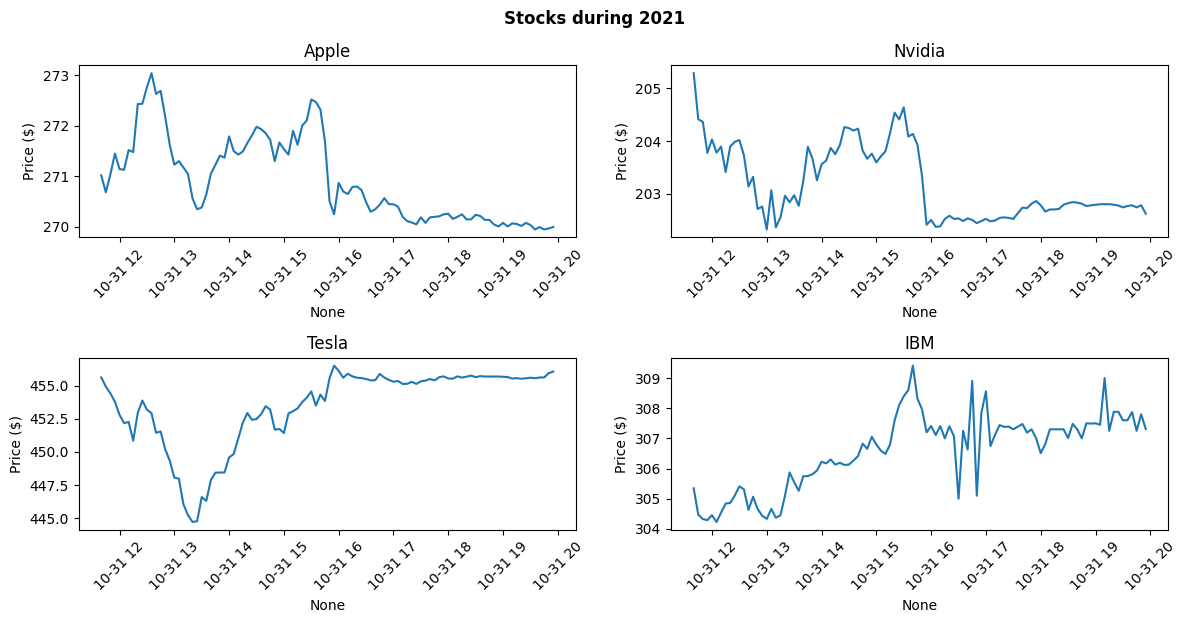

In [ ]:
# plotting multiple stocks with seaborn and matplotlib  
# flattening 2D array of axes to 1D array for easy iteration    

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, dpi=100, figsize=(12,6))

# 2D array -> 2D array has a method flatten() to create a numpy flattened array
print(repr(axes))
print(repr(axes.flatten()))

stock_names = {"AAPL": "Apple", "NVDA": "Nvidia",
               "TSLA": "Tesla", "IBM": "IBM"}

stocks_2022 = stocks.loc["2025"]

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data=stocks_2022, x=stocks_2022.index, y=symbol, ax=ax)
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price ($)")
    #ax.grid()

fig.tight_layout()
fig.suptitle("Stocks during 2021", y=1.03, fontweight="bold"); # add a main title 

In [ ]:
# Download and save stocks data from Alpha Vantage API in CSV files

import time

symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    for function, time_column in zip(["TIME_SERIES_DAILY", "TIME_SERIES_INTRADAY_EXTENDED"], ["timestamp", "time"]):
        url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}&datatype=csv&outputsize=full&interval=60min"

        df = pd.read_csv(url)
        df.set_index(df[time_column], inplace=True)
        df.index = pd.to_datetime(df.index)
        df.drop(time_column, axis=1, inplace=True)
        df.to_csv(f"../Data/Stocksdata/{symbol}_{function}.csv")

        # to not overload API
        time.sleep(15) 

- Merge, join, concatenate, append, read_html

**Databehandling 2025-10-31**

Dataset från kaggle 

serier - vad påverkar det? 
skilland mellan series och dataframe? series är en kollumn i en dataframe. 

loc (explicit index) och iloc vid slicing. Alltid använda iloc numera. 

funktioner på en dataframe (df)

**Databehandling 2025-10-29**

Setup dummy Dataframe
redundant? redundance - samma information i flera kolumner? 



***Saknade värden***  
- Viktigt att veta vad värdena betyder, kan de tas bort? eller ersättas med nåt? 
- Pandas behandla None,nun och NA nästan likadant 
- Datastorleken spelar roll - små dataset - måste vara mer försiktig med data, stora dataset - med få "nulls", kan antagligen ta bort hela rader. 
- kan vara en viktig datapunkt att datan saknas. Kan vara värdefull information som saknas. 
- titta på hur stor procent av värdena som saknas
- saknad data kan ha en negativ påverkan på datavisualisering, machinelearning algorithms, arithmetic computations


***Aggrigationer och Grupby***

In [ ]:
import numpy as np
import pandas as pd

n = 8
random_matrix = np.random.randint(1,10, (n, n)) #8*8 matrix with random integers
index = np.random.choice(random_matrix.size, 10, replace=False) 
print(f"index: {index}")
print(F"Flattened matrix: {random_matrix.ravel()}")

random_matrix = random_matrix*1.0 #convert to float matrix
random_matrix.ravel()[index] = None
print(random_matrix) # vad betyder det att ett värde inte finns med? NaN = Not a Number



In [ ]:
scores = pd.DataFrame(random_matrix, 
                    index=[f"player{i}" for i in range(1, n+1)],
                    columns=[f"player{i}" for i in range(1, n+1)])
print(scores)

In [ ]:
scores.isnull() # kolla vilka värden som är saknade 

In [ ]:
scores.dropna() # tar bort rader med saknade värden 

In [ ]:
scores.dropna(axis="columns") # tar bort kolumner med saknade värden

In [ ]:
scores.fillna(0)  # ersätter saknade värden med 0   

In [ ]:
# Kolla på titanic dataset
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()  

nulls = titanic.isnull().sum()
print(nulls)    

# Histogram över kön
sns.histplot(data=titanic, x="age", hue="sex", kde=True)    

median_male_age = titanic[titanic["sex"] == "male"]["age"].median()
median_female_age = titanic[titanic["sex"] == "female"]["age"].median() 

print(f"Median male age: {median_male_age}")
print(f"Median female age: {median_female_age}")   

titanic.loc[(titanic["sex"] == "male", "age")] = titanic.loc[(titanic["sex"] == "male", "age")].fillna(median_male_age)
titanic.loc [(titanic["sex"] == "female", "age")] = titanic.loc[(titanic["sex"] == "female", "age")].fillna(median_female_age)

titanic.loc[titanic["age"]==29,"age"] = None # via loc kan man skriva komma och fortsätta direkt efteråt (maskningar) 

print(titanic.isnull().sum().loc["age"])


In [ ]:
print(titanic.isnull().sum().loc["age"])
titanic.loc[titanic["age"].isnull(), "sex"].value_counts()


**Databehandling 2025-10-28**

**L0-pandas-basics**.ipynb (raphaels github) 

.loc    # 
.iloc   # 

- Slicing dataframes
- Masking - skicka in en array med en mask i, välja ut/byta ut värden. 
- Read excel data # df.info() # df["foodcategory"].uniqe() 
- Data cleaning 
- Sortera data # .sort_values() # ascending=false (från störst till lägst) # top 5 median - .groupby, .median, .sort_values, ascending=False, .head()
- 

In [ ]:

import sys, pandas as pd, numpy as np
print(sys.executable)
print(pd.__version__, np.__version__)
pd.DataFrame({"a":[1,2], "b":[3,4]})



In [ ]:
import pandas as pd

data = dict(AI = 25, NET = 30,  APP = 30) 

series_programs = pd.Series(data=data) 

#extract values (behandla som en lista även om det är en dict)
print(f"series_programs[0] -> {series_programs[0]}")
print(f"series_programs[0] -> {series_programs[-1]}")

# get keys
print(f"series_programs.keys[0] -> {series_programs.keys()}") 
print(f"series_programs.keys[0] -> {series_programs.keys()[2]}") 

***Aggregations and groupby***  
(mixa inte ihop agg() med aggregate() )

Aggregations:  (variabler som vi tittar på för att lära oss nåt om systemet. genom att kombinera variablerna kan vi räkna ut nya variabler. exempelvi acceleration på en boll - hastighet och motstånd..)
sum(), mean(), median(), min(), max())



In [ ]:
survivors = titanic.groupby("sex").mean(numeric_only=True)[["survived", "age"]] #numeric_only föra att ara plocka kolumner som har siffror i
for i in survivors.index:
    survived_percentage = survivors.loc[i, 'survived'] * 100
    print(f"Survival percentage for {i}: {survived_percentage:.1f}%")
    print(f"Mean age for {i}: {survivors.loc[i, 'age']:.1f} years")


In [ ]:
titanic.groupby("class")[["age", "fare"]].max()

In [ ]:
titanic.agg({"age": ["mean", "min", "max"], "fare": ["mean", "min", "max"]})


In [ ]:
survived_class = titanic.groupby(["survived", "pclass"]).count()
survived_class = survived_class.reset_index()
ax = sns.barplot(data=survived_class, x="pclass", y="who", hue="survived")  # who = antal personer, hue = överlevde eller inte  
ax.set(ylabel="count", title="Survival count in titanic vs class")

In [ ]:
import random as rnd
rnd.seed(42)

# create Series using list
dice_series = pd.Series([rnd.randint(1,6) for _ in range(5)])
print(dice_series)

print(f"Min value: {dice_series.min()}")
print(f"Mean value: {dice_series.mean()}") #deskriptiva statistics
print(f"Median value: {dice_series.median()}") #deskriptiva statistics

In [ ]:
# Slicing DataFrames
df_programs = pd.DataFrame({
    "Language": ["Python", "Java", "C#", "JavaScript", "Ruby"],
    "Students": [150, 120, 100, 130, 80]
})  

print (df_programs)
